<a href="https://colab.research.google.com/github/ZeroJoon2/DeepLearning/blob/main/5_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 불러오기

In [47]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = \

imdb.load_data(num_words = 10000)

In [18]:
print(f'''
{len(train_data[0])}
{train_data[0][:10]}
''')


218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]



In [4]:
train_labels[0] # 긍정 1, 부정 0

1

In [7]:
max([max(i) for i in train_data])

9999

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

decoded_review = ''.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

### 데이터 준비

In [30]:
# 피처의 단어번호를 원핫인코딩 처리
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence: # 원핫 인코딩
            results[i, j] = 1.
    print(results[0], results[0].shape)
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)


[0. 1. 1. ... 0. 0. 0.] (10000,)
[0. 1. 1. ... 0. 0. 0.] (10000,)


In [31]:
# labels
train_labels[:5]

array([1, 0, 0, 1, 0])

In [32]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 모델 구성

In [54]:
model = keras.Sequential(
    [
    layers.Dense(16, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

### 모델 구성

In [55]:
model.compile(optimizer = 'rmsprop'
            , loss = 'binary_crossentropy'
            , metrics = ['accuracy']
              )

In [56]:
x_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 훈련

In [57]:
history = model.fit(partial_X_train
                    , partial_y_train
                    , epochs = 20
                    , batch_size = 512
                    , validation_data = (x_val, y_val)
                    )
history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6732 - loss: 0.6261 - val_accuracy: 0.8493 - val_loss: 0.4314
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8889 - loss: 0.3700 - val_accuracy: 0.8818 - val_loss: 0.3291
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9173 - loss: 0.2695 - val_accuracy: 0.8788 - val_loss: 0.3047
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9299 - loss: 0.2120 - val_accuracy: 0.8902 - val_loss: 0.2763
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9444 - loss: 0.1712 - val_accuracy: 0.8854 - val_loss: 0.2838
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9535 - loss: 0.1505 - val_accuracy: 0.8837 - val_loss: 0.2936
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9635 - loss: 0.1234 - val_accuracy: 0.8859 - val_loss: 0.2891
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9712 - loss: 0.1056 - val_accuracy: 0.8726 - v

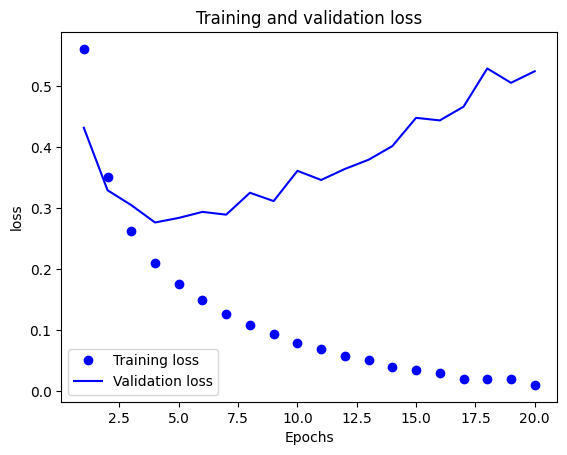

In [58]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs
         , loss_values
         , 'bo'
         , label = 'Training loss'
         )
plt.plot(
    epochs
    , val_loss_values
    , 'b'
    , label = 'Validation loss'
)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

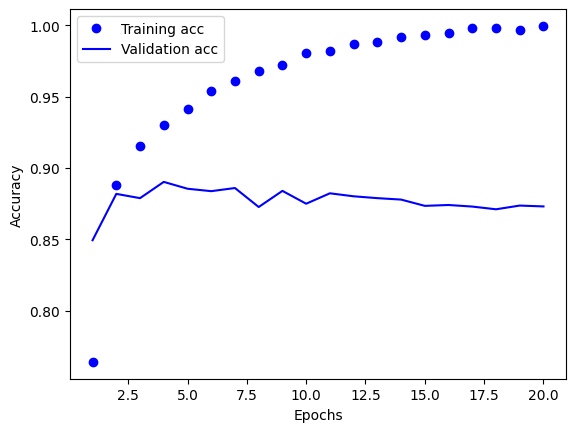

In [60]:
plt.plot(epochs
         , history_dict['accuracy']
         , 'bo'
         , label = 'Training acc')
plt.plot(epochs
         , history_dict['val_accuracy']
         , 'b'
         , label = 'Validation acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 검증

In [61]:
model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8555 - loss: 0.5800


[0.5661651492118835, 0.8599600195884705]

### 모델 구성 조정 > 검증 데이터 수행

In [59]:
model_adam = keras.Sequential(
    [
    layers.Dense(16, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_adam.compile(optimizer = 'adam'
            , loss = 'binary_crossentropy'
            , metrics = ['accuracy']
              )

history = model_adam.fit(partial_X_train
                    , partial_y_train
                    , epochs = 20
                    , batch_size = 512
                    , validation_data = (x_val, y_val)
                    )
history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6830 - loss: 0.6455 - val_accuracy: 0.8473 - val_loss: 0.4742
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8837 - loss: 0.4052 - val_accuracy: 0.8757 - val_loss: 0.3476
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9138 - loss: 0.2829 - val_accuracy: 0.8881 - val_loss: 0.2965
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9328 - loss: 0.2134 - val_accuracy: 0.8892 - val_loss: 0.2785
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9469 - loss: 0.1722 - val_accuracy: 0.8888 - val_loss: 0.2770
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9599 - loss: 0.1359 - val_accuracy: 0.8874 - val_loss: 0.2812
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9715 - loss: 0.1090 - val_accuracy: 0.8857 - val_loss: 0.2926
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9766 - loss: 0.0934 - val_accuracy: 0.8827 - v

In [62]:
model_modified = keras.Sequential(
    [
    layers.Dense(16, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified.compile(optimizer = 'rmsprop'
            , loss = 'binary_crossentropy'
            , metrics = ['accuracy']
              )

history = model_modified.fit(partial_X_train
                            , partial_y_train
                            , epochs = 4
                            , batch_size = 512
                            , validation_data = (x_val, y_val)
                            )


Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.6829 - loss: 0.6221 - val_accuracy: 0.8577 - val_loss: 0.4400
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8841 - loss: 0.3892 - val_accuracy: 0.8759 - val_loss: 0.3443
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9128 - loss: 0.2806 - val_accuracy: 0.8656 - val_loss: 0.3288
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9268 - loss: 0.2277 - val_accuracy: 0.8730 - val_loss: 0.3109


### 모델 구성 재조정

In [63]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(16, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
                            , loss = 'binary_crossentropy'
                            , metrics = ['accuracy']
                            )

history = model_modified_2.fit(X_train
                                , y_train
                                , epochs = 4
                                , batch_size = 512
                                )


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7111 - loss: 0.5607
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9042 - loss: 0.2829
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9231 - loss: 0.2113
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9368 - loss: 0.1782


In [67]:
model_modified_2.predict(X_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.16025922],
       [0.9989684 ],
       [0.83202475],
       ...,
       [0.09337961],
       [0.06294608],
       [0.45909244]], dtype=float32)

In [68]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(32, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(8, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
                            , loss = 'binary_crossentropy'
                            , metrics = ['accuracy']
                            )

history = model_modified_2.fit(X_train
                                , y_train
                                , epochs = 4
                                , batch_size = 512
                                )


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7067 - loss: 0.5593
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9024 - loss: 0.2715
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9220 - loss: 0.2087
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9350 - loss: 0.1757


In [69]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(32, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(8, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
                            , loss = 'mse'
                            , metrics = ['accuracy']
                            )

history = model_modified_2.fit(X_train
                                , y_train
                                , epochs = 4
                                , batch_size = 512
                                )


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6864 - loss: 0.2031
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8934 - loss: 0.0915
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.9176 - loss: 0.0683
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9282 - loss: 0.0579


In [70]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(32, activation = 'tanh')
    , layers.Dense(16, activation = 'tanh')
    , layers.Dense(8, activation = 'tanh')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
                            , loss = 'binary_crossentropy'
                            , metrics = ['accuracy']
                            )

history = model_modified_2.fit(X_train
                                , y_train
                                , epochs = 4
                                , batch_size = 512
                                )


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7314 - loss: 0.5348
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9037 - loss: 0.2529
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9306 - loss: 0.1933
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9374 - loss: 0.1677


In [72]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(32, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(8, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'adam'
            , loss = 'binary_crossentropy'
            , metrics = ['accuracy']
              )

history = model_modified_2.fit(partial_X_train
                    , partial_y_train
                    , epochs = 20
                    , batch_size = 512
                    , validation_data = (x_val, y_val)
                    )
history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.6478 - loss: 0.6303 - val_accuracy: 0.8663 - val_loss: 0.3732
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9092 - loss: 0.2875 - val_accuracy: 0.8890 - val_loss: 0.2790
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9482 - loss: 0.1636 - val_accuracy: 0.8836 - val_loss: 0.2885
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9730 - loss: 0.1090 - val_accuracy: 0.8813 - val_loss: 0.3174
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9844 - loss: 0.0695 - val_accuracy: 0.8808 - val_loss: 0.3489
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9920 - loss: 0.0454 - val_accuracy: 0.8763 - val_loss: 0.3882
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9973 - loss: 0.0270 - val_accuracy: 0.8755 - val_loss: 0.4350
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9988 - loss: 0.0178 - val_accuracy: 0.8736 - v

In [77]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(32, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(8, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
            , loss = 'binary_crossentropy'
            , metrics = ['accuracy']
              )

history = model_modified_2.fit(partial_X_train
                    , partial_y_train
                    , epochs = 20
                    , batch_size = 512
                    , validation_data = (x_val, y_val)
                    )
history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6861 - loss: 0.6063 - val_accuracy: 0.8521 - val_loss: 0.3954
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8934 - loss: 0.3262 - val_accuracy: 0.8864 - val_loss: 0.3008
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9236 - loss: 0.2346 - val_accuracy: 0.8857 - val_loss: 0.2829
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9388 - loss: 0.1860 - val_accuracy: 0.8867 - val_loss: 0.2815
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9539 - loss: 0.1458 - val_accuracy: 0.8846 - val_loss: 0.2892
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9629 - loss: 0.1223 - val_accuracy: 0.8860 - val_loss: 0.2978
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9651 - loss: 0.1087 - val_accuracy: 0.8678 - val_loss: 0.3531
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9726 - loss: 0.0869 - val_accuracy: 0.8803 - v

In [79]:
model_modified_2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                     │ (None, 32)                  │         320,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641,412 (2.45 MB)

 Trainable params: 320,705 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,707 (1.22 MB)

In [74]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(32, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(8, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
            , loss = 'mse'
            , metrics = ['accuracy']
              )

history = model_modified_2.fit(partial_X_train
                    , partial_y_train
                    , epochs = 20
                    , batch_size = 512
                    , validation_data = (x_val, y_val)
                    )
history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6218 - loss: 0.2282 - val_accuracy: 0.7705 - val_loss: 0.1642
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8602 - loss: 0.1286 - val_accuracy: 0.8729 - val_loss: 0.1056
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9042 - loss: 0.0868 - val_accuracy: 0.8628 - val_loss: 0.1024
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9195 - loss: 0.0708 - val_accuracy: 0.8773 - val_loss: 0.0923
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9313 - loss: 0.0583 - val_accuracy: 0.8827 - val_loss: 0.0869
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9462 - loss: 0.0506 - val_accuracy: 0.8824 - val_loss: 0.0851
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9519 - loss: 0.0442 - val_accuracy: 0.8750 - val_loss: 0.0923
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9578 - loss: 0.0397 - val_accuracy: 0.8781 - v

In [75]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(32, activation = 'tanh')
    , layers.Dense(16, activation = 'tanh')
    , layers.Dense(8, activation = 'tanh')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
            , loss = 'mse'
            , metrics = ['accuracy']
              )

history = model_modified_2.fit(partial_X_train
                    , partial_y_train
                    , epochs = 20
                    , batch_size = 512
                    , validation_data = (x_val, y_val)
                    )
history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6895 - loss: 0.1981 - val_accuracy: 0.8626 - val_loss: 0.1072
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8992 - loss: 0.0849 - val_accuracy: 0.8446 - val_loss: 0.1120
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9174 - loss: 0.0659 - val_accuracy: 0.8731 - val_loss: 0.0934
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9387 - loss: 0.0489 - val_accuracy: 0.8842 - val_loss: 0.0851
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9521 - loss: 0.0393 - val_accuracy: 0.8837 - val_loss: 0.0870
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9581 - loss: 0.0358 - val_accuracy: 0.8812 - val_loss: 0.0894
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9701 - loss: 0.0260 - val_accuracy: 0.8820 - val_loss: 0.0923
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9687 - loss: 0.0270 - val_accuracy: 0.8478 - v

In [76]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(32, activation = 'tanh')
    , layers.Dense(16, activation = 'tanh')
    , layers.Dense(8, activation = 'tanh')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
            , loss = 'mse'
            , metrics = ['accuracy']
              )

history = model_modified_2.fit(partial_X_train
                    , partial_y_train
                    , epochs = 4
                    , batch_size = 512
                    , validation_data = (x_val, y_val)
                    )
history

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6670 - loss: 0.2063 - val_accuracy: 0.8232 - val_loss: 0.1276
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8750 - loss: 0.0958 - val_accuracy: 0.8779 - val_loss: 0.0907
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9190 - loss: 0.0650 - val_accuracy: 0.8876 - val_loss: 0.0832
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9344 - loss: 0.0523 - val_accuracy: 0.8716 - val_loss: 0.0969


In [80]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(32, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(8, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
            , loss = 'binary_crossentropy'
            , metrics = ['accuracy']
              )

history = model_modified_2.fit(partial_X_train
                    , partial_y_train
                    , epochs = 4
                    , batch_size = 512
                    , validation_data = (x_val, y_val)
                    )
history

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.6727 - loss: 0.6012 - val_accuracy: 0.8620 - val_loss: 0.3723
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8940 - loss: 0.3149 - val_accuracy: 0.8789 - val_loss: 0.3018
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9172 - loss: 0.2346 - val_accuracy: 0.8753 - val_loss: 0.3047
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9370 - loss: 0.1801 - val_accuracy: 0.8825 - val_loss: 0.2903


In [82]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(32, activation = 'relu')
    , layers.Dense(16, activation = 'relu')
    , layers.Dense(8, activation = 'relu')
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
            , loss = 'mse'
            , metrics = ['accuracy']
              )

history = model_modified_2.fit(partial_X_train
                    , partial_y_train
                    , epochs = 20
                    , batch_size = 512
                    , validation_data = (x_val, y_val)
                    )
history

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6637 - loss: 0.2157 - val_accuracy: 0.8025 - val_loss: 0.1429
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8669 - loss: 0.1134 - val_accuracy: 0.8825 - val_loss: 0.0967
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9153 - loss: 0.0762 - val_accuracy: 0.8729 - val_loss: 0.0958
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9225 - loss: 0.0654 - val_accuracy: 0.8868 - val_loss: 0.0866
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9462 - loss: 0.0504 - val_accuracy: 0.8873 - val_loss: 0.0833
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9514 - loss: 0.0436 - val_accuracy: 0.8843 - val_loss: 0.0868
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9547 - loss: 0.0414 - val_accuracy: 0.8846 - val_loss: 0.0834
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9656 - loss: 0.0330 - val_accuracy: 0.8843 - v

In [90]:
model_modified_2 = keras.Sequential(
    [
    layers.Dense(64, activation = 'relu')
    , layers.Dropout(0.03)
    , layers.Dense(32, activation = 'relu')
    , layers.Dropout(0.03)
    , layers.Dense(16, activation = 'relu')
    , layers.Dropout(0.03)
    , layers.Dense(8, activation = 'relu')
    , layers.Dropout(0.03)
    , layers.Dense(1, activation = 'sigmoid')
    ] #스칼라 0, 1 사이의 확률
)

model_modified_2.compile(optimizer = 'rmsprop'
            , loss = 'binary_crossentropy'
            , metrics = ['accuracy']
              )

history = model_modified_2.fit(partial_X_train
                    , partial_y_train
                    , epochs = 4
                    , batch_size = 256
                    , validation_data = (x_val, y_val)
                    )
model_modified_2.summary()

Epoch 1/4
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6846 - loss: 0.5783 - val_accuracy: 0.8257 - val_loss: 0.4177
Epoch 2/4
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8933 - loss: 0.2798 - val_accuracy: 0.8874 - val_loss: 0.2822
Epoch 3/4
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9346 - loss: 0.1862 - val_accuracy: 0.8863 - val_loss: 0.2917
Epoch 4/4
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9548 - loss: 0.1317 - val_accuracy: 0.8721 - val_loss: 0.3289


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                     │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,285,636 (4.90 MB)

 Trainable params: 642,817 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 642,819 (2.45 MB)